In [87]:
import numpy as np 
import cv2
import os

In [88]:
root = '.'
image_dir = os.path.join(root, 'Pictures')
image_files = os.listdir(image_dir)

In [89]:
images = [cv2.imread(os.path.join(image_dir, image_file)) for image_file in image_files]

In [90]:
images[-1].shape

(1194, 736, 3)

In [44]:
# Setting height and width for each cell in output grid
height = 360
width = 640

In [45]:
# Calculate the rows
row = int(np.ceil(len(images)/2))

# Create empty container for images
container = np.zeros((row * height, 2 * width, 3))

# Loop through each row, inserting all the images to each cell
for i in range(row):
    try:
        # loop through the image when processed image is not even
        left_photo = cv2.resize(images[i * 2], (width, height))
        right_photo = cv2.resize(images[i * 2 + 1], (width, height))
        # Insert left image to the container
        container[i*height:(i+1)*height, 0:width] = left_photo
        # Insert right image to the container
        container[i*height:(i+1)*height, width:2*width] = right_photo
    except Exception as e:
        #  Add last image when requesting even images
        photo = cv2.resize(images[i * 2], (2*width, height))
        container[i*height:(i+1)*height, 0:2*width] = photo
cv2.imwrite('temp.jpg', container)

True

In [35]:
cv2.imshow("container", container)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
cv2.imshow("images", right_photo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
right_photo.shape

(360, 640, 3)

<h1>Resizing Image</h1>
<p></p>
<li>Cek panjang dibanding lebar</li>
<li>Yang lebih besar jadikan 800</li>
<li>Satunya kalikan lebih besar / lebih kecil</li>
<li>Cut the other one in the middle of 800</li>

(1194, 736, 3)

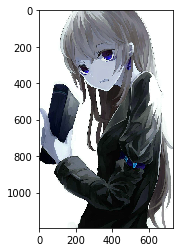

In [165]:
from matplotlib import pyplot as plt
# Coba dalam 1 gambar
image = images[-1]
plt.imshow(image)
image.shape

In [166]:
# Cek panjang
if image.shape[1] > image.shape[0]:
    longer_dim = 1
    long = image.shape[1]
    short = image.shape[0]
    other_shape = int(800 * long / short)
    # yang lebih kecil jadikan 800 
    new_shape = (800, other_shape)
elif image.shape[0] > image.shape[1]:
    longer_dim = 0
    long = image.shape[0]
    short = image.shape[1]
    other_shape = int(800 * long / short)
    # yang lebih kecil jadikan 800 
    new_shape = (other_shape,800)
longer_dim
new_shape

(1297, 800)

(1297, 800, 3)

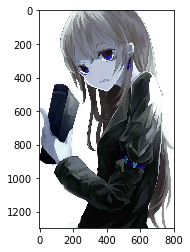

In [167]:
# resize image 
image = cv2.resize(image, new_shape[::-1]) # opencv use reversed indexing
plt.imshow(image)
image.shape

In [51]:
# make it rectangle
# Finding the cut point
other_shape = int(800 * long / short)
cut_point = int((other_shape - 800) / 2 )
cut_point

311

(800, 800, 3)

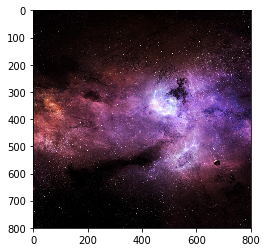

In [53]:
# crop the image
if longer_dim == 1:
    cropped_image = image[:, cut_point:cut_point+800]
else:
    cropped_image = image[cut_point:cut_point+800, :]
plt.imshow(cropped_image)
cropped_image.shape

In [168]:
# Wrap everything into single function
def crop_square(image):
    square_side = 800
    # Cek panjang
    if image.shape[1] > image.shape[0]:
        longer_dim = 1
        long = image.shape[1]
        short = image.shape[0]
        other_shape = int(square_side * long / short)
        # yang lebih kecil jadikan 800 
        new_shape = (square_side, other_shape)
    elif image.shape[0] > image.shape[1]:
        longer_dim = 0
        long = image.shape[0]
        short = image.shape[1]
        other_shape = int(square_side * long / short)
        # yang lebih kecil jadikan 800 
        new_shape = (other_shape, square_side)
    # resize image
    image = cv2.resize(image, new_shape[::-1]) # opencv use reversed indexing
    # make it rectangle
    # Finding the cut point
    cut_point = int((other_shape - square_side) / 2 )
    # crop the image
    if longer_dim == 1:
        cropped_image = image[:, cut_point:cut_point+square_side]
    else:
        cropped_image = image[cut_point : cut_point+square_side, :]
    return cropped_image

(1194, 736, 3)

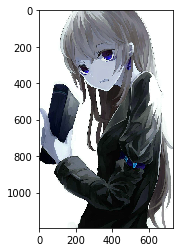

In [169]:
# testing function
image = images[-1]
plt.imshow(image)
image.shape

(800, 800, 3)

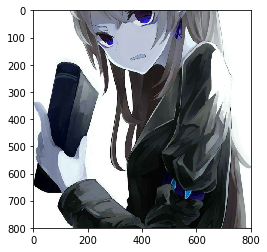

In [170]:
crop_image = crop_square(image)
plt.imshow(crop_image)
crop_image.shape